<a href="https://colab.research.google.com/github/FussyReich/Fake-thumbnail/blob/main/%E9%87%A3%E3%82%8A%E3%82%B5%E3%83%A0%E3%83%8D%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


800
800
Epoch 1/30
20/20 [==============================] - 4s 73ms/step - loss: 2.0418 - accuracy: 0.6400 - val_loss: 0.4929 - val_accuracy: 0.8675
Epoch 2/30
20/20 [==============================] - 1s 46ms/step - loss: 0.3533 - accuracy: 0.8617 - val_loss: 0.1936 - val_accuracy: 0.9300
Epoch 3/30
20/20 [==============================] - 1s 45ms/step - loss: 0.1692 - accuracy: 0.9533 - val_loss: 0.2478 - val_accuracy: 0.9000
Epoch 4/30
20/20 [==============================] - 1s 46ms/step - loss: 0.1283 - accuracy: 0.9583 - val_loss: 0.1424 - val_accuracy: 0.9575
Epoch 5/30
20/20 [==============================] - 1s 53ms/step - loss: 0.0824 - accuracy: 0.9750 - val_loss: 0.1620 - val_accuracy: 0.9375
Epoch 6/30
20/20 [==============================] - 1s 54ms/step - loss: 0.0628 - accuracy: 0.9817 - val_loss: 0.0912 - val_accuracy: 0.9700
Epoch 7/30
20/20 [==============================] - 1s 74ms/step - loss: 0.0349 - accuracy: 0.9883 - val_loss: 0.1322 - val_accuracy: 0.9500
Epoch

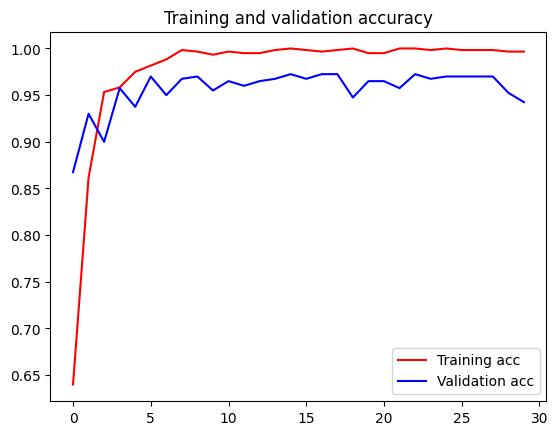

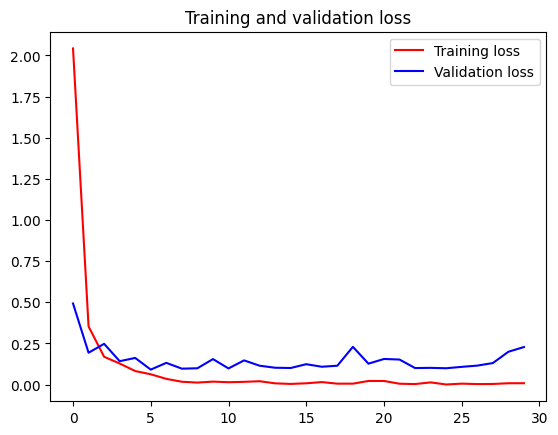

In [10]:
import glob
import PIL
import keras
from keras.preprocessing import image

#リサイズする画像サイズ
input_shape = (160, 90, 3)
#クラス数
num_classes = 2
#画像データ
x = []
#ラベル(1:正例, 0:負例)
y = []

#釣りサムネデータ=image_list_positive
#通常のサムネデータ=image_list_positive
image_list_positive = glob.glob('/content/drive/MyDrive/Colab Notebooks/Bad/*.png')

for f in image_list_positive:
    x.append(image.img_to_array(image.load_img(f, target_size=input_shape[:2])))
    y.append(1)

image_list_negative = glob.glob('/content/drive/MyDrive/Colab Notebooks/Good/*.png')

for f in image_list_negative:
    x.append(image.img_to_array(image.load_img(f, target_size=input_shape[:2])))
    y.append(0)

print(len(image_list_positive))
print(len(image_list_negative))

import numpy as np
from keras.utils import plot_model, to_categorical
from sklearn.model_selection import train_test_split

x = np.asarray(x)
x /= 255
y = np.asarray(y)
#ラベルをカテゴリカル変数へ変換
y = keras.utils.to_categorical(y, num_classes)

#画像データセットを学習用とテスト用に分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state= 3)

#モデル
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Dropout, Flatten

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=adam,
              metrics=['accuracy'])
#バッチサイズ
batch_size = 30
#エポック数
epochs = 30
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          steps_per_epoch=20, #len(x_train),
          epochs=epochs,
          verbose=1,
          #validation_steps = y_train_val,
          validation_data=(x_test, y_test))
predictions = model.predict(x_test)

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))


plt.plot(epochs, acc, label='Training acc', color='r')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss', color='r')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
